In [2]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [10]:
# Load your dataset (replace 'placement_data.csv' with your file name)
placement_data = pd.read_csv('college_student_placement_dataset.csv')

# Check first few rows
print(placement_data.head())
print(placement_data.tail())


  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1       

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 2: Clean column names
placement_data.columns = placement_data.columns.str.strip()

# Step 3: Map categorical columns to numeric
placement_data['Prev_Sem_Result'] = placement_data['Prev_Sem_Result'].map({'Fail': 0, 'Pass': 1})
placement_data['Academic_Performance'] = placement_data['Academic_Performance'].map({'Poor': 0, 'Average': 1, 'Good': 2})
placement_data['Internship_Experience'] = placement_data['Internship_Experience'].map({'No': 0, 'Yes': 1})
placement_data['Placement'] = placement_data['Placement'].map({'No': 0, 'Yes': 1})  # target column

# Step 4: Split into features and target
X = placement_data.drop(['College_ID', 'Placement'], axis=1)  # drop ID and target
y = placement_data['Placement']

# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Optional - check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 8)
X_test shape: (2000, 8)
y_train shape: (8000,)
y_test shape: (2000,)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the model
rf = RandomForestClassifier(random_state=42)

# Step 2: Train the model
rf.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9995
Confusion Matrix:
 [[1674    0]
 [   1  325]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



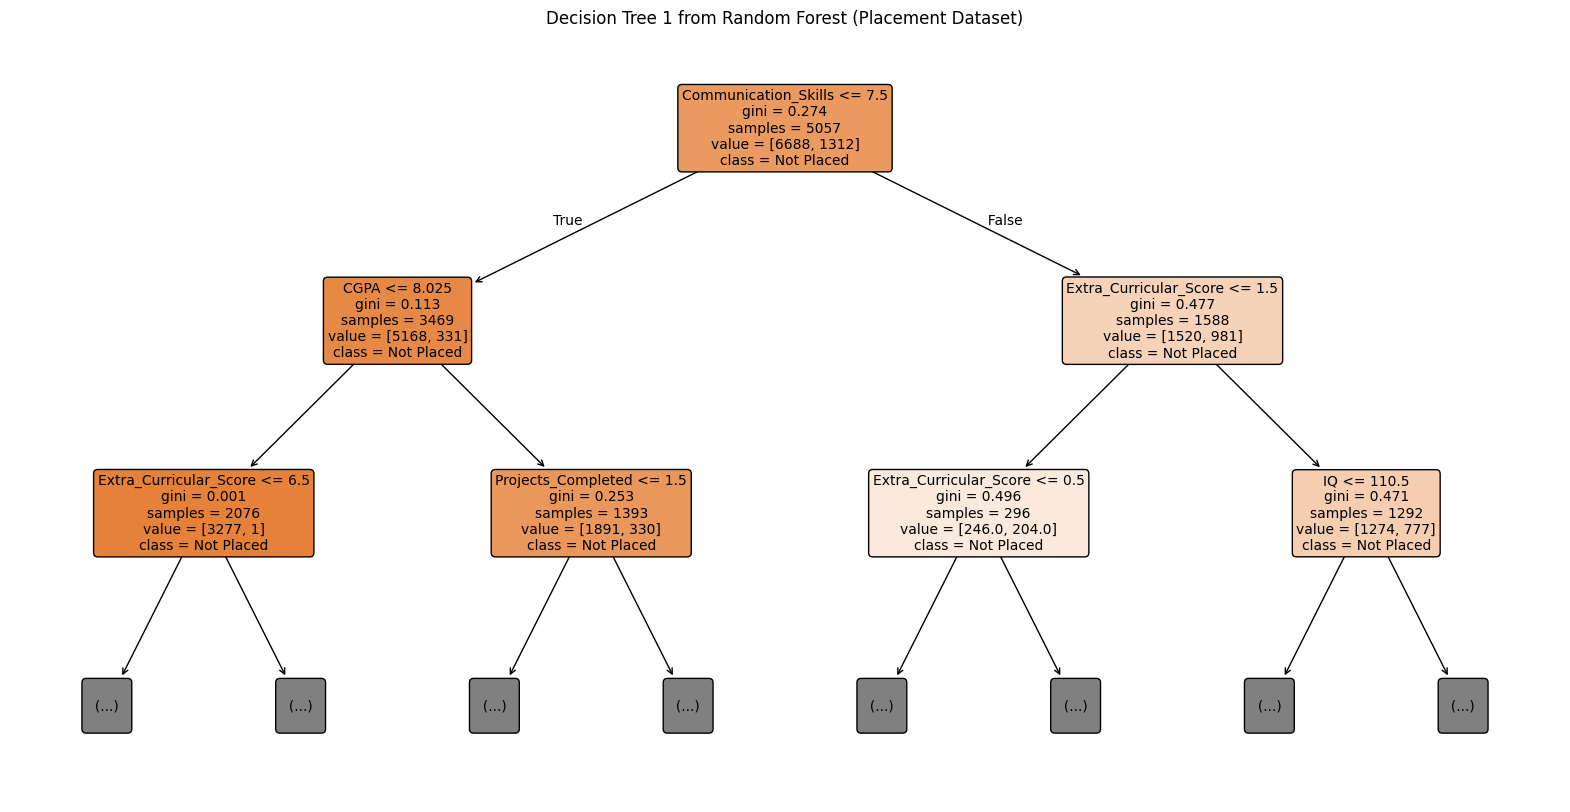

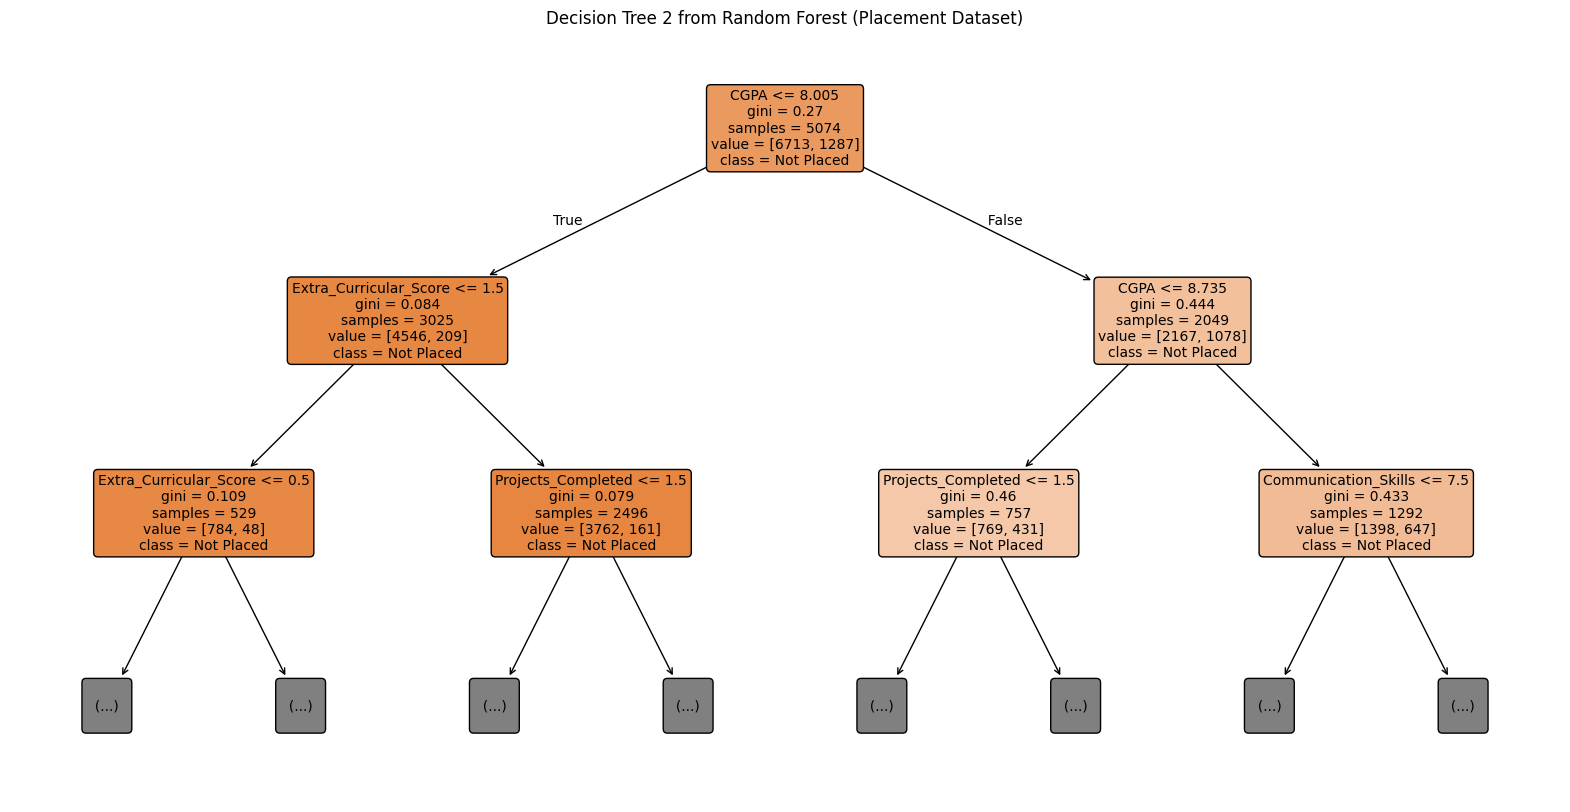

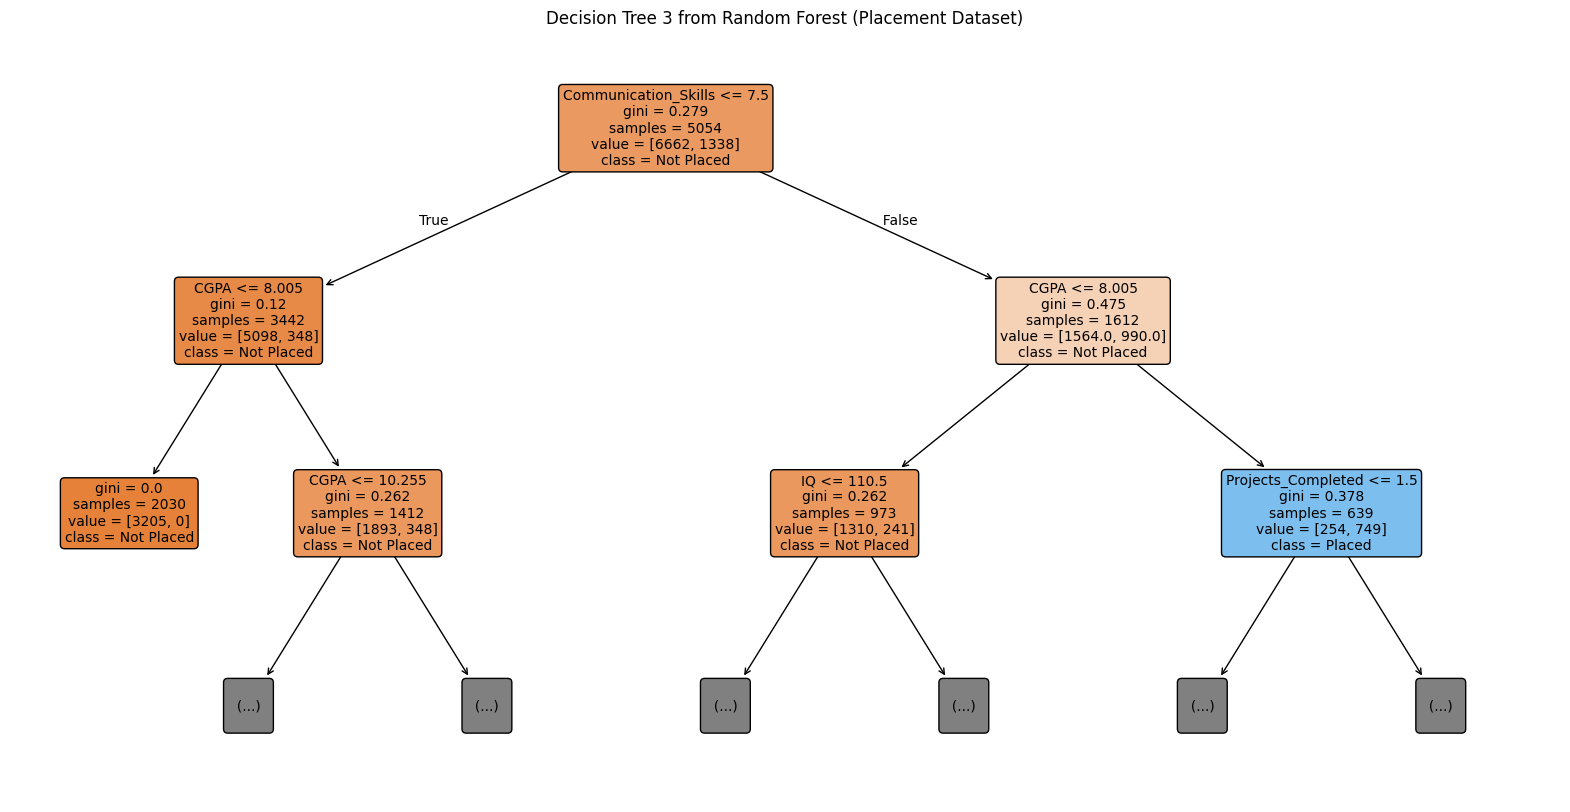

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the first 3 trees from the Random Forest
for i in range(3):
    plt.figure(figsize=(20,10))
    plot_tree(
        rf.estimators_[i],
        feature_names=X_train.columns,
        class_names=['Not Placed', 'Placed'],
        filled=True,
        rounded=True,
        fontsize=10,
        max_depth=2   # limit depth for readability
    )
    plt.title(f"Decision Tree {i+1} from Random Forest (Placement Dataset)")
    plt.show()
